In [175]:
# Dataset 1 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# Feature selection
from sklearn.decomposition import PCA
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
#df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

print(df.shape)

(6497, 13)


In [173]:
# preprocessing StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the object 
scaler = StandardScaler()
# Calculate the mean and the standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

In [174]:
for i in range(2,13):
    pca_13 = PCA(n_components = i, random_state = 42)
    X_pca_13 = pca_13.fit_transform(X_scaled)
    print(X_pca_13.shape)

(6497, 2)
(6497, 3)
(6497, 4)
(6497, 5)
(6497, 6)
(6497, 7)
(6497, 8)
(6497, 9)
(6497, 10)
(6497, 11)
(6497, 12)


Variance explained by all 13 principal components =  100.0
[26.05586817 22.46878841 13.64847899  8.91387115  6.59072068  5.27922728
  4.447251    4.33195145  3.63887424  2.46299623  1.90160954  0.26036284]
[ 26.05586817  48.52465658  62.17313557  71.08700672  77.6777274
  82.95695469  87.40420569  91.73615714  95.37503138  97.83802761
  99.73963716 100.        ]


Text(0.5, 1.0, 'Variance explained by all principal components for my dataset 1')

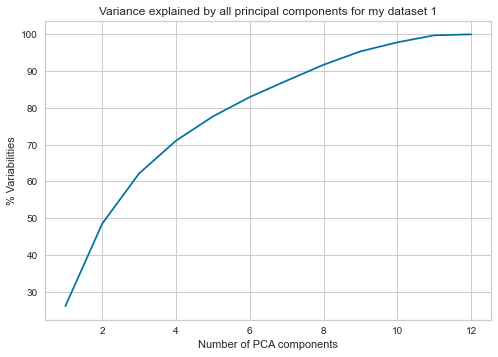

In [178]:
pca_13 = PCA(n_components = 12, random_state = 42)
pca_13.fit(X_scaled)
X_pca_13 = pca_13.transform(X_scaled)

print("Variance explained by all 13 principal components = ",
     sum(pca_13.explained_variance_ratio_*100))

print(pca_13.explained_variance_ratio_*100)

print(np.cumsum(pca_13.explained_variance_ratio_*100))

X=[i for i in range(1,13)]
plt.plot(X,np.cumsum(pca_13.explained_variance_ratio_*100))
plt.xlabel('Number of PCA components')
plt.ylabel('% Variabilities')
plt.title('Variance explained by all principal components for my dataset 1')

In [118]:
pca_3 = PCA(n_components = 3, random_state = 42)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

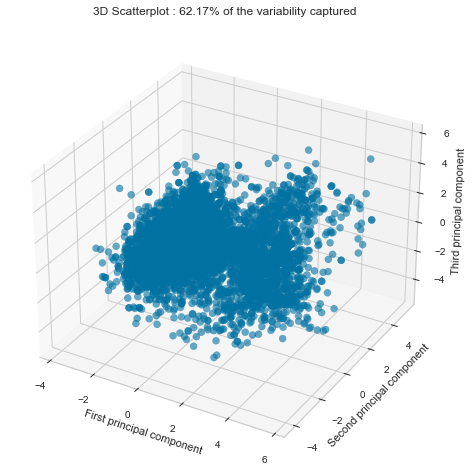

In [119]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection ='3d')

sctt = ax.scatter3D(X_pca_3[:,0],X_pca_3[:,1],X_pca_3[:,2],
                    s=50, alpha = 0.6)

plt.title("3D Scatterplot : 62.17% of the variability captured",pad = 15)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.savefig('3d_scatterplot.png')

/Users/ye/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


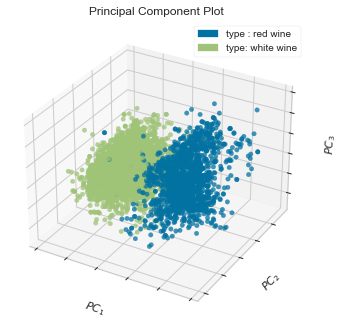

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [170]:
from yellowbrick.features import PCA
visualizer = PCA(
    scale=True, projection=3, classes=['type : red wine','type: white wine'])
visualizer.fit_transform(X, y)
visualizer.show()

In [150]:
pca_90 = PCA(n_components = 0.90, random_state = 42)
X_pca_90 = pca_90.fit_transform(X_scaled)
print(X_pca_90.shape)

(6497, 8)


In [151]:
df_new = pd.DataFrame(X_pca_90, columns =['PC1','PC2','PC3','PC4','PC5'
                                         ,'PC6','PC7','PC8'] )

df_new['type'] = df.type
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,type
0,-2.264454,3.047540,-0.024546,-0.117018,-1.789746,-0.147529,0.134958,0.278578,1
1,0.048457,-0.480664,-0.461841,0.178021,0.582698,-0.895323,0.744521,0.101708,1
2,-0.141869,0.334999,0.566709,0.206276,-0.336629,-0.764246,0.169970,-0.571668,1
3,-1.677870,1.031612,-0.224578,-0.091706,-0.080583,0.238110,0.444512,-0.465885,1
4,-1.677870,1.031612,-0.224578,-0.091706,-0.080583,0.238110,0.444512,-0.465885,1


In [152]:
# save the data
df_new.to_csv('wine_quality_pca_90.csv', index=False)

In [143]:
pca_98 = PCA(n_components = 0.98, random_state = 42)
X_pca_98 = pca_98.fit_transform(X_scaled)
print(X_pca_98.shape)

(6497, 11)


In [145]:
df_new2 = pd.DataFrame(X_pca_98, columns =['PC1','PC2','PC3','PC4','PC5'
                                         ,'PC6','PC7','PC8','PC9','PC10','PC11'] )

df_new2['type'] = df.type
df_new2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,type
0,-2.264454,3.047540,-0.024546,-0.117018,-1.789746,-0.147529,0.134958,0.278578,0.609083,-0.048005,-0.262166,1
1,0.048457,-0.480664,-0.461841,0.178021,0.582698,-0.895323,0.744521,0.101708,-0.151628,1.146420,0.239019,1
2,-0.141869,0.334999,0.566709,0.206276,-0.336629,-0.764246,0.169970,-0.571668,-0.440004,-0.115862,-0.137982,1
3,-1.677870,1.031612,-0.224578,-0.091706,-0.080583,0.238110,0.444512,-0.465885,-0.466161,-0.193408,0.472889,1
4,-1.677870,1.031612,-0.224578,-0.091706,-0.080583,0.238110,0.444512,-0.465885,-0.466161,-0.193408,0.472889,1


In [147]:
# save the data
df_new2.to_csv('wine_quality_pca_98.csv', index=False)

In [182]:
pca = PCA(n_components = 0.90, random_state = 42)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

df_new3 = pd.DataFrame(X_pca, columns =['PC1','PC2','PC3','PC4','PC5'
                                         ,'PC6','PC7','PC8'] )

df_new3['type'] = df.type
df_new3.head()

# save the data
df_new3.to_csv('wine_quality_pca.csv', index=False)

(6497, 8)
